<hr id="import">

<h2>1. Data Collection</h2>

Import the `Pandas` library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Read the data from `data.csv` into a `Pandas DataFrame`

In [2]:
df=pd.read_csv(r'C:\Users\Halawany Laptop\Desktop\data science\sul. acid.csv')
df.head(10)

,day,fr,p
0,1,742,200.862186
1,2,896,140.142425
2,3,879,140.529812
3,4,766,170.786623
4,5,560,265.086175
5,6,585,240.931230
6,7,714,155.952562
7,8,514,280.000072
8,9,789,150.615644
9,10,628,190.783263


In [3]:
df.tail(10)

,day,fr,p
116,117,700,135.649032
117,118,628,157.681353
118,119,716,120.320573
119,120,870,90.362530
120,121,747,120.640220
121,122,678,134.859753
122,123,573,175.381089
123,124,606,160.383629
124,125,852,94.221588
125,126,647,144.618544


<hr id="clean">

<h2>2. Data Cleaning and Preparation</h2>

<h5 id="clean-missing">Handle missing values</h5>

Identify missing values

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   day     126 non-null    int64  
 1   fr      126 non-null    int64  
 2   p       126 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 3.1 KB


In [5]:
df.isna().sum()

day    0
fr     0
p      0
dtype: int64

Drop rows with "NaN" from certain columns

In [6]:
df.dropna(inplace=True)
df.head()

,day,fr,p
0,1,742,200.862186
1,2,896,140.142425
2,3,879,140.529812
3,4,766,170.786623
4,5,560,265.086175


<h5 id="clean-duplicates">Remove duplicates</h5>

In [7]:
df.duplicated().sum()

0

In [8]:
df.drop_duplicates(inplace=True)
df

,day,fr,p
0,1,742,200.862186
1,2,896,140.142425
2,3,879,140.529812
3,4,766,170.786623
4,5,560,265.086175
...,...,...,...
121,122,678,134.859753
122,123,573,175.381089
123,124,606,160.383629
124,125,852,94.221588


Standardize data

In [9]:
df.iloc[:, 1:] = df.iloc[:, 1:].astype(float)

<h5>Validate cleaned data</h5>

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   day     126 non-null    int64  
 1   fr      126 non-null    float64
 2   p       126 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 3.1 KB


In [11]:
df.duplicated().sum()

0

<h5>Create extra required features</h5>

In [12]:
inpower=50
tothead=df['p']+24/0.434
outpower=(df['fr']*tothead)/3960
df['eff'] = (outpower/inpower)
df.head(10)

,day,fr,p,eff
0,1,742.0,200.862186,0.959960
1,2,896.0,140.142425,0.884424
2,3,879.0,140.529812,0.869364
3,4,766.0,170.786623,0.874657
4,5,560.0,265.086175,0.906141
5,6,585.0,240.931230,0.875227
6,7,714.0,155.952562,0.761788
7,8,514.0,280.000072,0.870424
8,9,789.0,150.615644,0.820541
9,10,628.0,190.783263,0.780505


In [13]:
df.tail(10)

,day,fr,p,eff
116,117,700.0,135.649032,0.675071
117,118,628.0,157.681353,0.675515
118,119,716.0,120.320573,0.635071
119,120,870.0,90.362530,0.640030
120,121,747.0,120.640220,0.663773
121,122,678.0,134.859753,0.651152
122,123,573.0,175.381089,0.667576
123,124,606.0,160.383629,0.660121
124,125,852.0,94.221588,0.643394
125,126,647.0,144.618544,0.653268


<hr id="eda">

<h2>3. Exploratory Data Analysis</h2>

<h5>Descriptive Analysis</h5>

In [14]:
df_desc = df.describe()
df_desc

,day,fr,p,eff
count,126.000000,126.000000,126.000000,126.000000
mean,63.500000,694.722222,170.899597,0.773424
std,36.517119,111.764154,42.786326,0.071800
min,1.000000,504.000000,90.362530,0.635071
25%,32.250000,595.750000,138.138159,0.715655
50%,63.500000,699.500000,163.830357,0.774321
75%,94.750000,769.750000,195.334229,0.829803
max,126.000000,896.000000,280.866499,0.959960


<h5>Visualize Parameters and identify outliers</h5>

Box plot

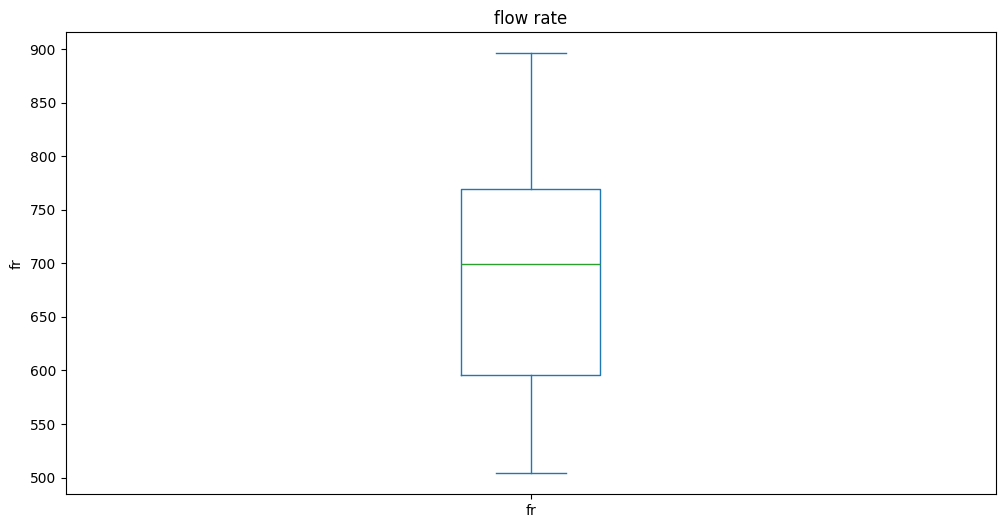

In [15]:
# box plot
df['fr'].plot(kind='box', figsize=(12, 6), title='flow rate', ylabel='fr')
plt.show()

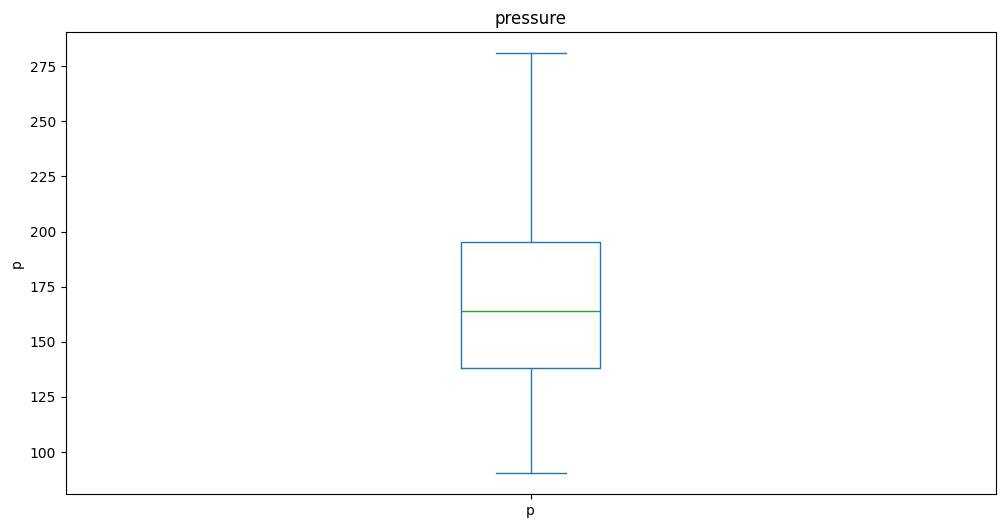

In [16]:
df['p'].plot(kind='box', figsize=(12, 6), title='pressure', ylabel='p')
plt.show()

Remove outliers

In [17]:
iqr = df_desc.loc['75%', 'p'] - df_desc.loc['25%', 'p']
upper_bound = df_desc.loc['75%', 'p'] + 1.5 * iqr
lower_bound = df_desc.loc['25%', 'p'] - 1.5 * iqr
df = df[(df['p'] < upper_bound) & (df['p'] > lower_bound)]

Remove impractical entries

In [18]:
df[df['fr'] < 0 ]
df[df['p'] < 0 ]

,day,fr,p,eff


<hr id="model">

<h2>4. Model Development and Evaluation</h2>

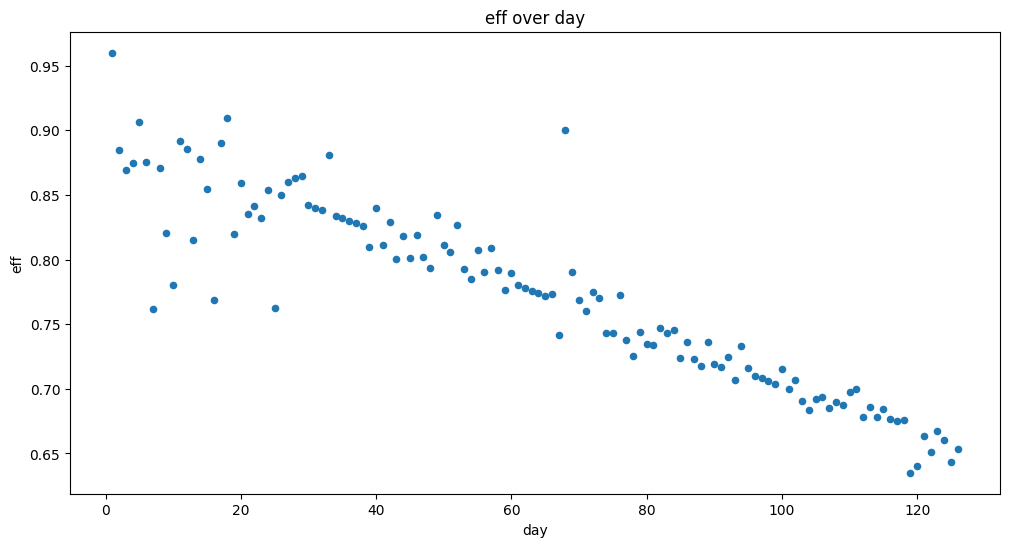

In [19]:
df.plot(kind='scatter', x='day', y='eff', figsize=(12, 6), title='eff over day')
plt.show()

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


lr = LinearRegression()


X = df[['eff']]
Y = df['day']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

lr.fit(X_train, y_train)


y_pred = lr.predict(X_test)


print('Coefficients: \n', lr.coef_)
print('Intercept: \n', lr.intercept_)

Coefficients: 
 [-478.8694806]
Intercept: 
 432.95554375161885


In [21]:
maitenve_day= lr.predict([[0.7]])
maitenve_day

c:\Users\Halawany Laptop\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([97.74690733])